# Análise de dados: Falsificação de cédulas de Real (R$)

Neste projeto serão analisados os dados de falsificação de cédulas de Real (R$) com base nos dados (.csv) do período entre 1995 e 2021 acessíveis no portal de [Dados Abertos](https://dadosabertos.bcb.gov.br/) disponibilizados pelo [Banco Central do Brasil](https://www.bcb.gov.br/).

## Demanda da análise

- Demonstrar a evolução das falsificações
- Identificar as cédulas mais falsificadas
- Identificar os estados com mais incidência de falsificações

## Indagações a serem respondidas pela análise exploratória dos dados

1. Qual o total de falsificações por cédula (1995 a 2021)?
2. Qual o total de falsificações por ano (1995 a 2021)?
3. Qual o total de falsificações por cédula e por ano (1995 a 2021)?
4. Qual o total de falsificações por estado no período de 1995 a 2021?

## Importação de pacotes

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados

In [2]:
# Criando um dataframe atribuindo o arquivo csv no diretório dados e definindo o nome das colunas

df = pd.read_csv('dados/Falsificacao_DadosAbertos.csv', sep=';', header=None)

df.columns = ['Ano', 'Estado', 'Família', 'Denominação', 'Quantidade']


## Detalhes do dataframe

In [3]:
# Amostra de dados do dataframe

df.sample(10)


,Ano,Estado,Família,Denominação,Quantidade
2563,2012,CEARÁ,Cédulas - 1a. família,10.0,"417,00"
3646,2015,RIO GRANDE DO NORTE,Cédulas - 2a. família,50.0,"655,00"
2125,2010,DISTRITO FEDERAL,Cédulas - 1a. família,5.0,"352,00"
2282,2011,ALAGOAS,Cédulas - 1a. família,2.0,"35,00"
3598,2015,PARANÁ,Cédulas - 1a. família,100.0,"9.342,00"
3745,2016,ALAGOAS,Cédulas - 1a. família,20.0,"49,00"
4221,2017,PARANÁ,Cédulas - 1a. família,2.0,"89,00"
5277,2020,RONDÔNIA,Cédulas - 2a. família,20.0,"424,00"
4033,2016,TOCANTINS,Cédulas - 2a. família,2.0,"1,00"
4778,2019,ESPÍRITO SANTO,Cédulas - 2a. família,50.0,"832,00"


In [4]:
# Quantidade de linhas e colunas

df.shape


(5680, 5)

In [5]:
# Removendo a coluna que não será utilizada na análise

df = df.drop(columns=['Família'])
df.shape


(5680, 4)

In [6]:
# Informações das colunas como nome, contagem de linhas nulas e tipo de dados

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          5680 non-null   int64  
 1   Estado       5680 non-null   object 
 2   Denominação  5680 non-null   float64
 3   Quantidade   5680 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 177.6+ KB


## Tratando valores nulos

In [7]:
# Identificando a quantidade de valores nulos, no caso não há dados nulos

df.isnull().sum()


Ano            0
Estado         0
Denominação    0
Quantidade     0
dtype: int64

## Tratando os tipos de valores

In [8]:
# Identificando os tipos de dados das colunas

df.dtypes


Ano              int64
Estado          object
Denominação    float64
Quantidade      object
dtype: object

In [9]:
# Efetuando as conversões necessárias dos tipos de dados e exibindo novamente as informações das colunas

df['Ano'] = df['Ano'].astype('int')
df['Quantidade'] = [(str(i).replace('.', ''))
                    for i in df['Quantidade']]  # 1.000,00 para 1000,00
df['Quantidade'] = [(str(i).replace(',', '.'))
                    for i in df['Quantidade']]  # 1000,00 para 1000.00
df['Quantidade'] = [float(str(i)) for i in df['Quantidade']]
df['Quantidade'] = df['Quantidade'].astype('int')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          5680 non-null   int32  
 1   Estado       5680 non-null   object 
 2   Denominação  5680 non-null   float64
 3   Quantidade   5680 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 133.2+ KB


## Selecionando o período entre 1995 e 2021

In [10]:
# Criando um dataframe com todos os períodos, exceto o ano corrente de 2022

df_remover = df.loc[df['Ano'] == 2022]

df = df.drop(df_remover.index)

print(df['Ano'].unique())


[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


## Amostra de dados do dataframe após tratamento das informações

In [11]:
df.sample(10)


,Ano,Estado,Denominação,Quantidade
5580,2021,RONDÔNIA,10.0,13
4260,2017,RIO DE JANEIRO,2.0,82
4222,2017,PARANÁ,2.0,16
3888,2016,PARÁ,20.0,77
3893,2016,PARÁ,100.0,3173
739,2003,MATO GROSSO,10.0,6
4935,2019,RIO GRANDE DO SUL,20.0,7991
3590,2015,PARANÁ,5.0,362
4372,2018,ACRE,50.0,118
329,2001,ACRE,10.0,154


## 1. Qual o total de falsificações por cédula (1995 a 2021)?

             Quantidade          %
Denominação                       
1.0                2427   0.022753
2.0               33634   0.315322
5.0              400002   3.750063
10.0            1693150  15.873467
20.0            1256381  11.778710
50.0            4538901  42.552694
100.0           2690548  25.224182
200.0             51499   0.482809


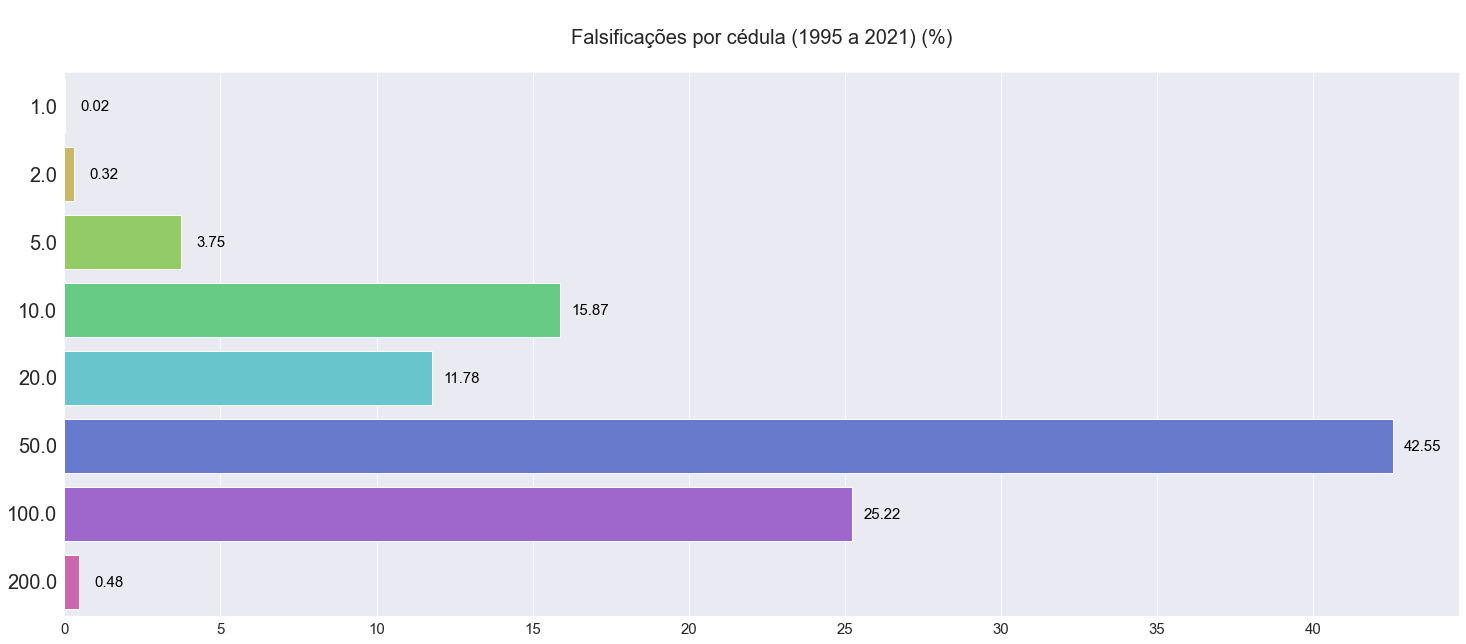

In [12]:
df_temp = df.groupby(['Denominação'])['Quantidade'].sum()
df_denominacao_quantidade = pd.DataFrame(df_temp)
df_denominacao_quantidade['%'] = df_denominacao_quantidade['Quantidade'] / \
    df_denominacao_quantidade['Quantidade'].sum() * 100

print(df_denominacao_quantidade)

plt.figure(figsize=(25, 10))
plot = sns.barplot(y=df_denominacao_quantidade.index,
                   x=df_denominacao_quantidade['%'],
                   orient='h',
                   palette='hls')
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha='center',
                  va='baseline',
                  fontsize=15,
                  color='black',
                  xytext=(30, -5),
                  textcoords='offset points')

plt.xticks(size=15)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por cédula (1995 a 2021) (%)\n', fontsize=20)
plt.show(plot)


As notas de R<span>&#36;</span> 50, R<span>&#36;</span> 100 e R<span>&#36;</span> 10 estão entre as notas mais falsificadas, somente a cédula de R<span>&#36;</span> 50 responde por mais de 42% (4.514.259) do total das falsificações, sendo a nota de R<span>&#36;</span> 100 correspondendo a mais de 25% (2.685.357) do total.

## 2. Qual o total de falsificações por ano (1995 a 2021)?

      Quantidade         %
Ano                       
1995         242  0.002269
1996       16421  0.153949
1997         624  0.005850
1998        6874  0.064445
1999       29162  0.273397
2000      329111  3.085452
2001      381709  3.578564
2002      413883  3.880198
2003      548887  5.145876
2004      499255  4.680570
2005      448158  4.201530
2006      638036  5.981657
2007      678949  6.365221
2008      538201  5.045693
2009      503228  4.717818
2010      434657  4.074957
2011      434084  4.069585
2012      519987  4.874935
2013      551157  5.167157
2014      529578  4.964852
2015      477689  4.478387
2016      506633  4.749740
2017      548542  5.142641
2018      561808  5.267012
2019      498961  4.677814
2020      324985  3.046770
2021      245721  2.303661


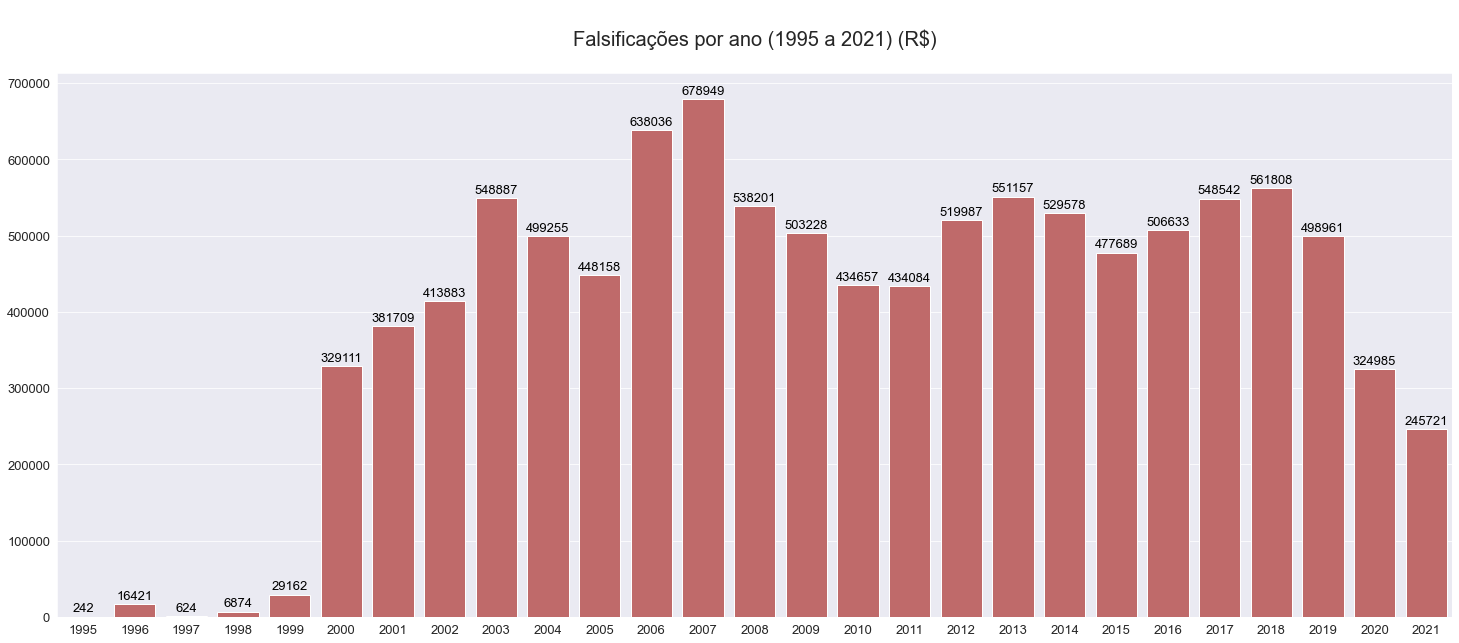

In [13]:
df_temp = df.groupby(['Ano'])['Quantidade'].sum()
df_ano_quantidade = pd.DataFrame(df_temp)
df_ano_quantidade['%'] = df_ano_quantidade['Quantidade'] / \
    df_ano_quantidade['Quantidade'].sum() * 100

print(df_ano_quantidade)

plt.figure(figsize=(25, 10))
plot = sns.barplot(x=df_ano_quantidade.index,
                   y=df_ano_quantidade['Quantidade'],
                   orient='v',
                   palette=['indianred'])
for i in plot.patches:
    plot.annotate(format(i.get_height(), '3.0f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por ano (1995 a 2021) (R$)\n', fontsize=20)
plt.show(plot)


O período entre 2006 e 2007 corresponde aos anos em que houve a maior quantidade de cédulas falsas identificadas pelo Banco Central, sendo que em 2007 houve um recorde de 678.949 notas falsas. Desde que foi iniciado a contabilização de falsificações em 1995, o período entre 2020 e 2021 foi o intervalo em que ocorreram a mais fortes quedas nas falsificações, coincidentemente em 2020 iniciou-se a pandemia de Covid-19.

## 3. Qual o total de falsificações por cédula e por ano (1995 a 2021)?

Ano          1995   1995
Denominação  50.0  100.0
Quantidade    240      2 

Ano         1996  1996  1996   1996
Denominação  5.0  10.0  50.0  100.0
Quantidade     2  6088  8001   2330 

Ano         1997  1997  1997   1997
Denominação  5.0  10.0  50.0  100.0
Quantidade   182   108   154    180 

Ano         1998  1998  1998   1998
Denominação  5.0  10.0  50.0  100.0
Quantidade    72  3512  2181   1109 

Ano         1999 1999   1999   1999   1999
Denominação  1.0  5.0   10.0   50.0  100.0
Quantidade    20  863  12643  14066   1570 

Ano         2000   2000    2000    2000   2000
Denominação  1.0    5.0    10.0    50.0  100.0
Quantidade   294  15914  176003  132244   4656 

Ano         2001   2001    2001  2001    2001   2001
Denominação  1.0    5.0    10.0  20.0    50.0  100.0
Quantidade   336  30340  205249     9  143747   2028 

Ano         2002 2002   2002    2002   2002    2002   2002
Denominação  1.0  2.0    5.0    10.0   20.0    50.0  100.0
Quantidade   405  722  30681  188658  10

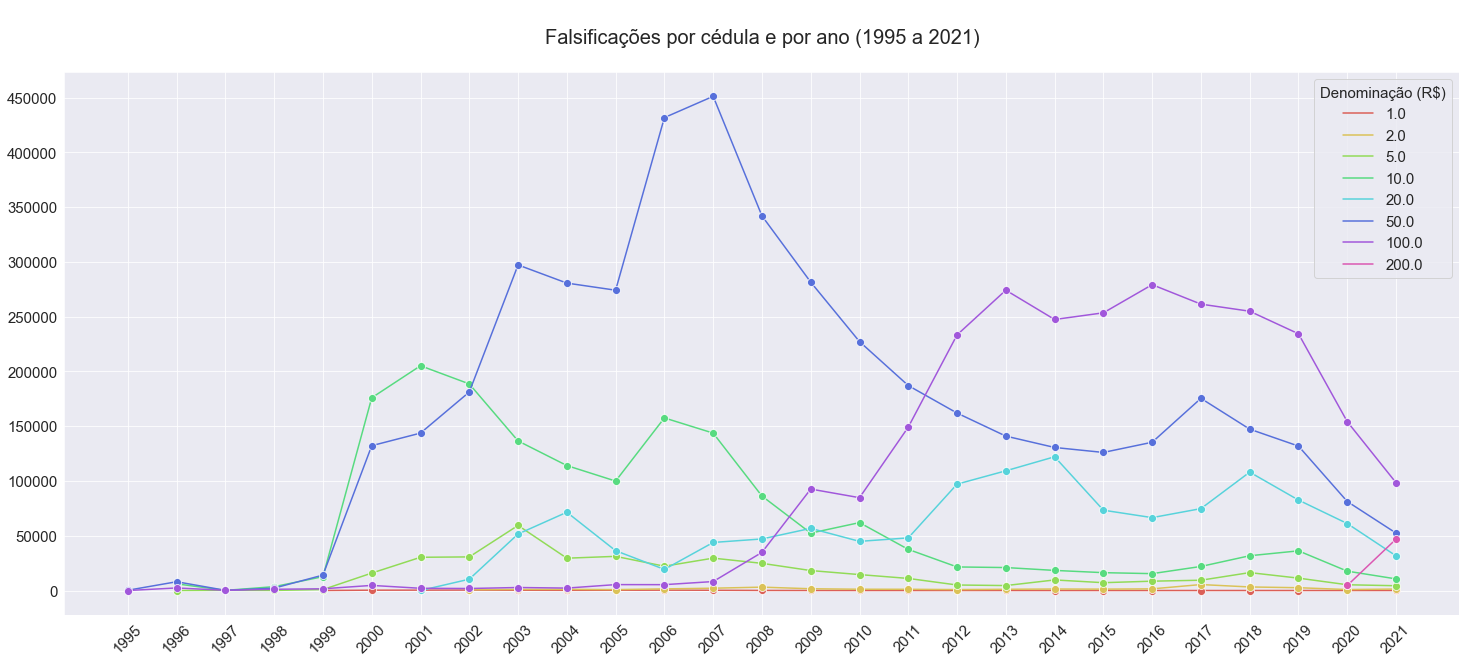

In [14]:
df_temp = df.groupby(['Ano', 'Denominação'])['Quantidade'].sum()
df_ano_denominacao_quantidade = pd.DataFrame(df_temp)

df_ano_denominacao_quantidade.reset_index(level=1, inplace=True, col_level=1)

df_ano_denominacao_quantidade['Denominação'] = df_ano_denominacao_quantidade['Denominação'].astype(
    'str')

tabela = df_ano_denominacao_quantidade.T

for i in set(tabela.columns):
    print(tabela[i], "\n")

plt.figure(figsize=(25, 10))
plot = sns.lineplot(x=df_ano_denominacao_quantidade.index,
                    y=df_ano_denominacao_quantidade['Quantidade'],
                    hue=df_ano_denominacao_quantidade['Denominação'],
                    data=df_ano_denominacao_quantidade,
                    marker='o',
                    markersize=8, palette='hls',
                    hue_order=['1.0', '2.0', '5.0', '10.0', '20.0', '50.0', '100.0', '200.0'])
xlabels = list(set(df_ano_denominacao_quantidade.index.tolist()))
ylabels = np.arange(0, 500000, 50000)
plt.xticks(xlabels, rotation=45, size=15)
plt.yticks(ylabels, size=15)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por cédula e por ano (1995 a 2021)\n', fontsize=20)
plt.legend(fontsize=15, title='Denominação (R$)', title_fontsize=15)
plt.show(plot)


No ano de 2001 a cédula de R<span>&#36;</span> 10 era mais identificada como falsa, porém em 2003 com o ápice em 2007 a nota de R<span>&#36;</span> 50 era a mais falsificada, até 2011 houve um forte declínio, em 2012 a cédula de R<span>&#36;</span> 100 passou a ser a que mais apresentava incidência de falsificações e em 2018 iniciou-se uma queda nas três cédulas mais falsificadas (R<span>&#36;</span> 100, R<span>&#36;</span> 50 e R<span>&#36;</span> 20).

## 4. Qual o total de falsificações por estado no período de 1995 a 2021?

                     Quantidade          %
Estado                                    
SÃO PAULO               3726672  34.937958
RIO DE JANEIRO          1167922  10.949397
MINAS GERAIS            1065724   9.991279
PARANÁ                   716458   6.716872
RIO GRANDE DO SUL        661547   6.202076
BAHIA                    458700   4.300363
GOIÁS                    438440   4.110423
SANTA CATARINA           397738   3.728837
PERNAMBUCO               339519   3.183028
DISTRITO FEDERAL         287291   2.693385
CEARÁ                    228143   2.138866
MATO GROSSO DO SUL       227749   2.135172
ESPÍRITO SANTO           125582   1.177345
PARÁ                     122316   1.146726
MARANHÃO                  97759   0.916501
MATO GROSSO               95812   0.898248
PARAÍBA                   73503   0.689099
ALAGOAS                   69406   0.650689
RIO GRANDE DO NORTE       67881   0.636392
PIAUÍ                     66984   0.627982
SERGIPE                   63259   0.593060
AMAZONAS   

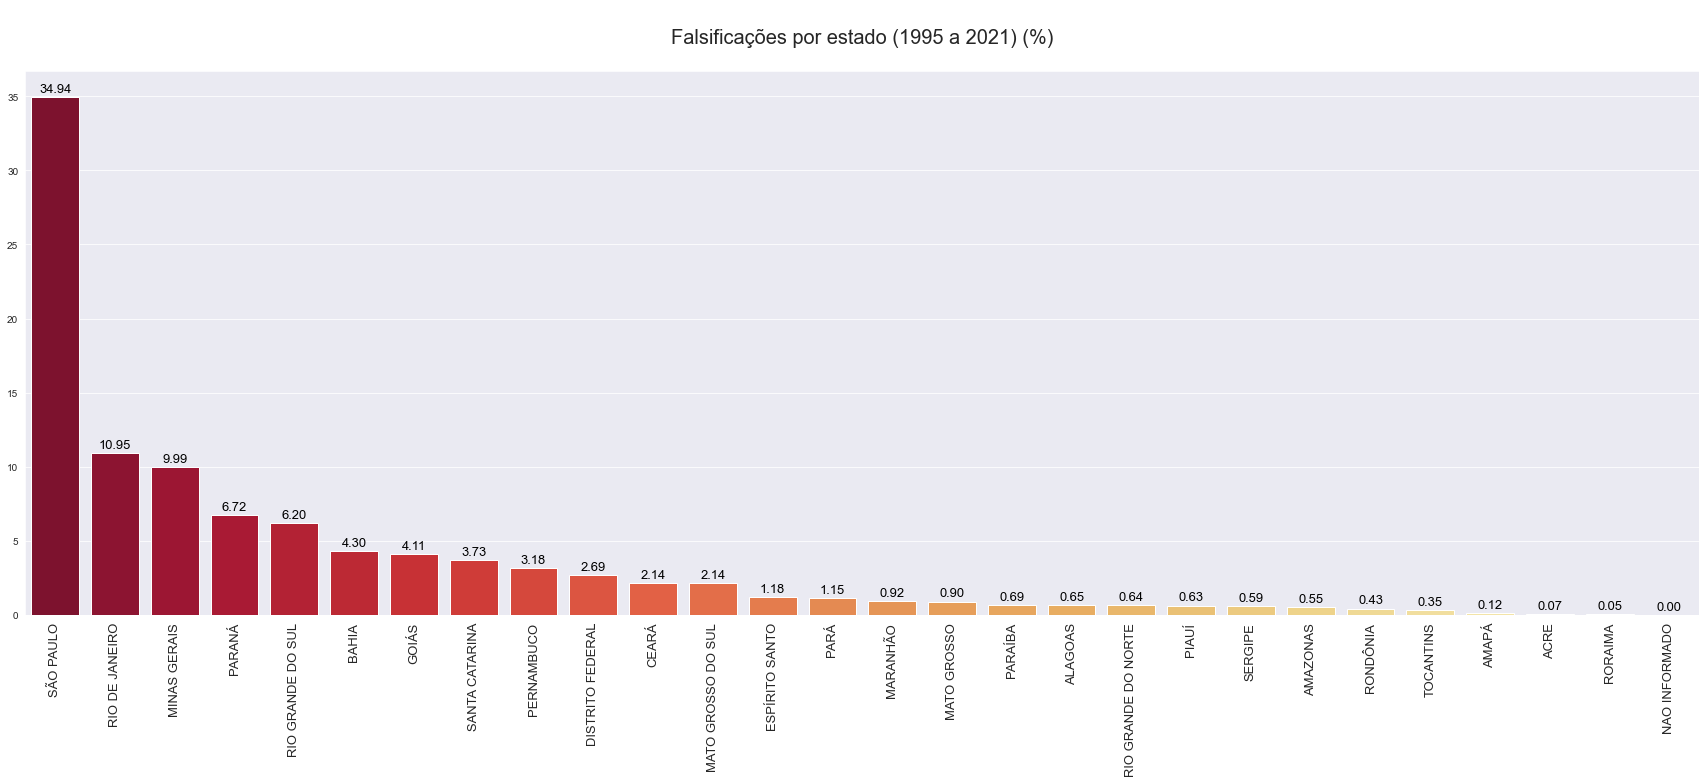

In [15]:
df_temp = df.groupby(['Estado'])['Quantidade'].sum()
df_estado_quantidade = pd.DataFrame(df_temp)
df_estado_quantidade['%'] = df_estado_quantidade['Quantidade'] / \
    df_estado_quantidade['Quantidade'].sum() * 100

df_estado_quantidade = df_estado_quantidade.sort_values(
    'Quantidade', ascending=False)

print(df_estado_quantidade)

plt.figure(figsize=(30, 10))
plot = sns.barplot(x=df_estado_quantidade.index,
                   y=df_estado_quantidade['%'],
                   orient='v',
                   palette='YlOrRd_r')
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90, size=13)
plt.title('\nFalsificações por estado (1995 a 2021) (%)\n', fontsize=20)
plt.show(plot)


São Paulo lidera na quantidade de cédulas enviadas ao Banco Central e identificadas como falsas, mais de 34% (3.726.672), somando os estados de Rio de Janeiro com mais de 10% (1.167.922) e Minas Gerais com mais de 9% (1.065.724), ambos da região sudeste, temos mais de 55% (5.960.318) de participação no total de notas falsificadas.